# Housing Assignment
###### Business Goals:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

* Load the data and understand the variables
* Data Inspection
* EDA
* Missing Value Imputation if required
* Train-Test Split
* Modelling and Tuning with Regularization (Ridge & Lasso)
* Evaluation

###### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

# Graph and chart libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Model libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Step 1-  Load the data and understand the variables

In [2]:
house= pd.read_csv("train.csv")
house.shape

(1460, 81)

In [3]:
#top 5 rows of dataset
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Data set has rows = 1460, columns = 81

# Step 2- Data Inspection

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Step 3- EDA

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

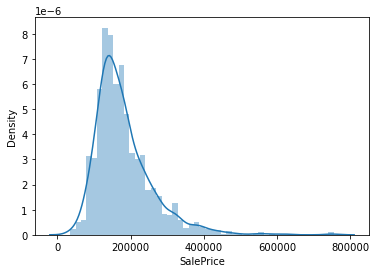

In [7]:
#Distribution Plot for the target variable
sns.distplot(house["SalePrice"])

In [8]:
# Checking duplicates

duplicates = house.duplicated()
print(duplicates.sum())

0


There are no duplicate records

##### Univeriate

<AxesSubplot:>

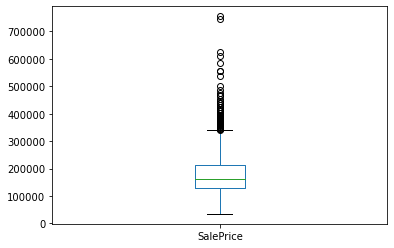

In [9]:
# Checking outliers
house["SalePrice"].plot(kind = 'box')

In [10]:
#Outlier treatment
#IQR technique

# def treat_outlier(col):
#     q1,q3 = col.quantile([0.25,0.75])
#     print("First Quartlie- ", q1)
#     print("Third Quartlie- ", q3)
#     IQR = q3-q1
#     print(IQR)
#     lower_range = q1-(1.5*IQR)
#     upper_range = q3 + (1.5*IQR)
#     return lower_range, upper_range

In [11]:
# lowersale,uppersale=treat_outlier(house['SalePrice'])
# house['SalePrice']=np.where(house['SalePrice']>uppersale,uppersale,house['SalePrice'])
# house['SalePrice']=np.where(house['SalePrice']<lowersale,lowersale,house['SalePrice'])

In [12]:
# house["SalePrice"].plot(kind = 'box')

In [13]:
# Geting all the number columns

# num_cols = house.select_dtypes(include=np.number).columns.tolist()
num_cols = ["LotFrontage","LotArea","MasVnrArea","GrLivArea","GarageArea"]
num_data = house[num_cols]
num_data.head()

,LotFrontage,LotArea,MasVnrArea,GrLivArea,GarageArea
0,65.0,8450,196.0,1710,548
1,80.0,9600,0.0,1262,460
2,68.0,11250,162.0,1786,608
3,60.0,9550,0.0,1717,642
4,84.0,14260,350.0,2198,836


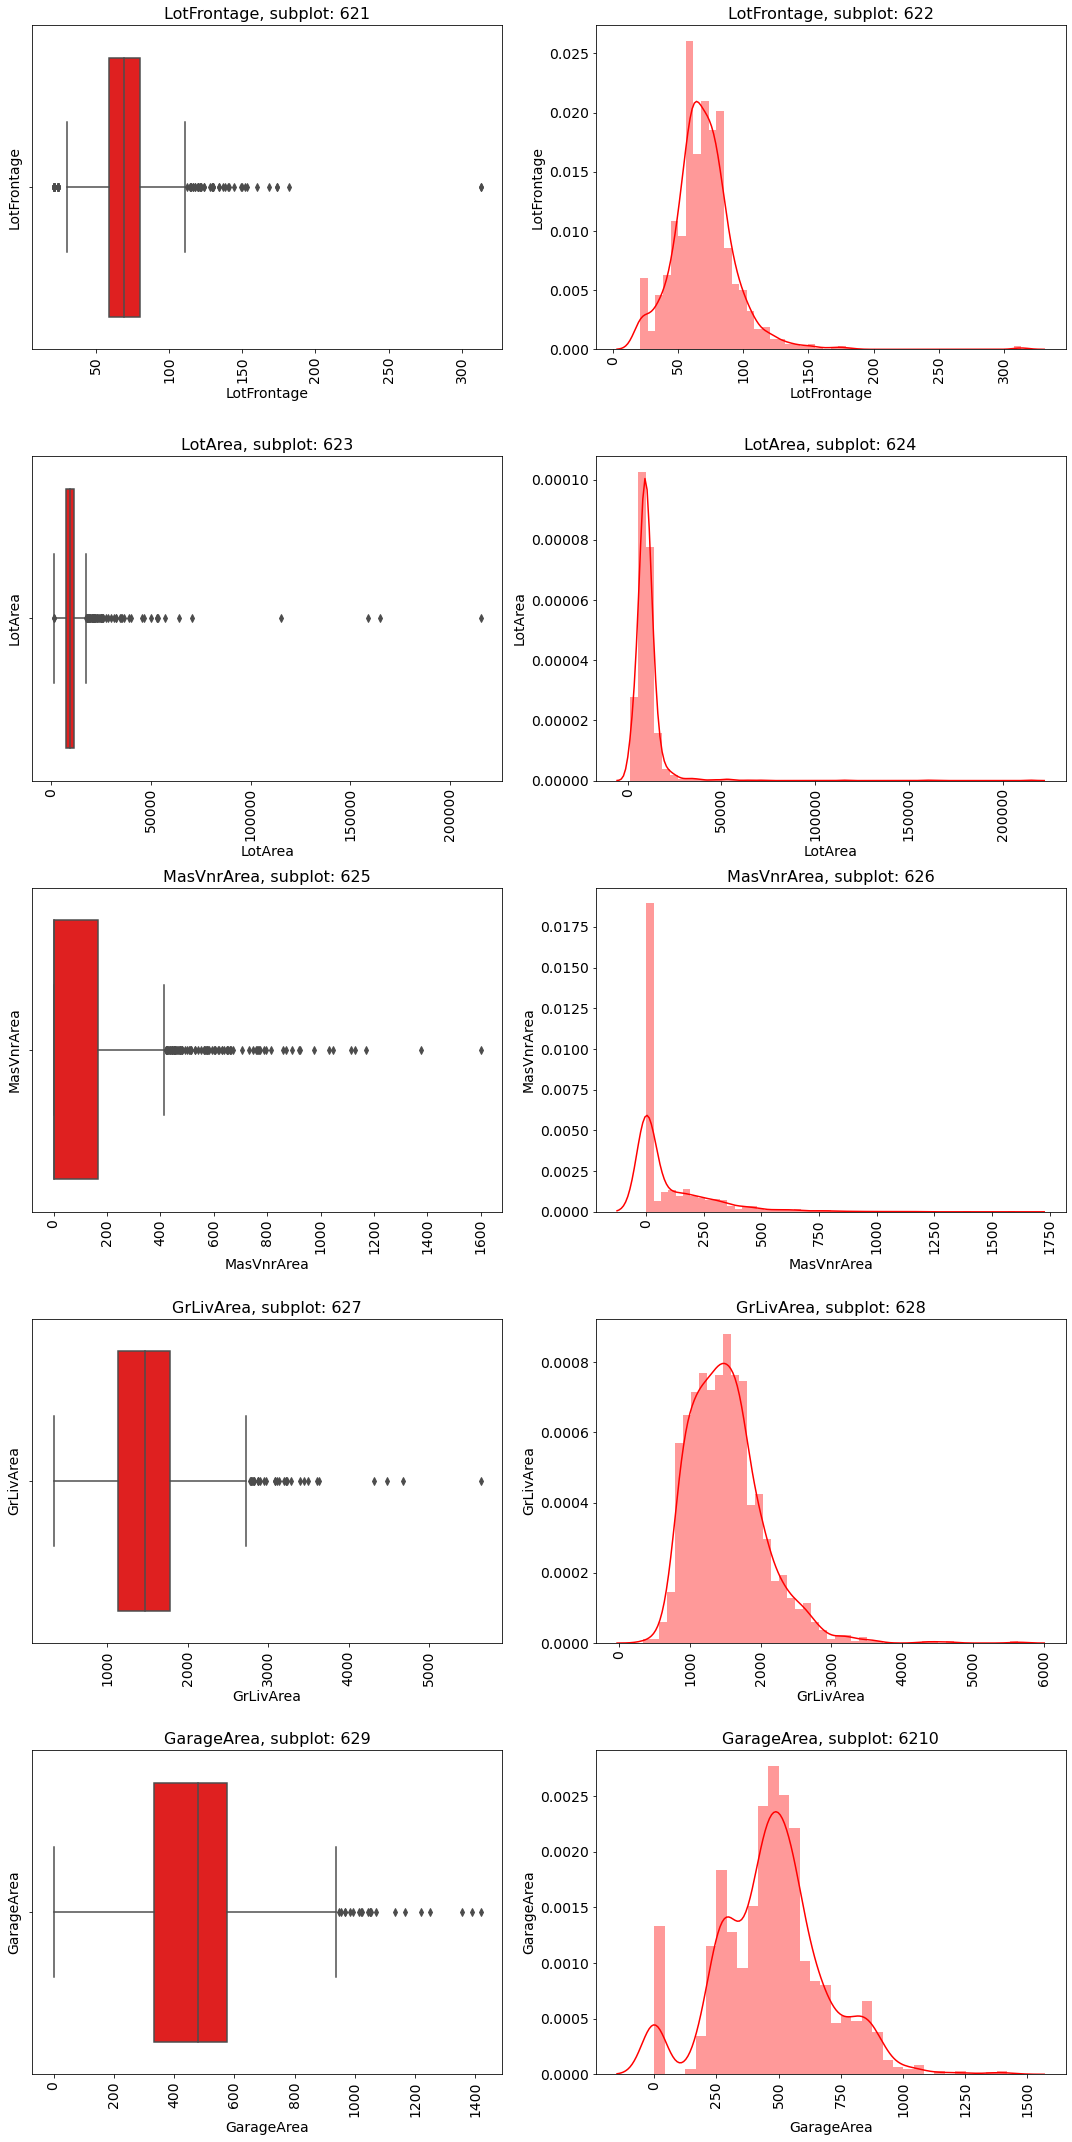

In [14]:
a = 6
b = 2
c = 1

fig = plt.figure(figsize=(30,40))
fig.set_size_inches(15, 35)

for i in num_cols:
    plt.subplot(a,b,c)
    plt.title('{}, subplot: {}{}{}'.format(i,a,b,c),fontsize=16)
    plt.xlabel(i,fontsize=14)
    plt.ylabel(i,fontsize=14)
    plt.xticks(fontsize=10,rotation=90)
    plt.tick_params(axis='both', which='major', labelsize=14)
    sns.boxplot(num_data[i],color = 'r') #check the estimator 'mean' here by default
    c = c+1
    
    plt.subplot(a,b,c)
    plt.title('{}, subplot: {}{}{}'.format(i,a,b,c),fontsize=16)
    plt.xlabel(i,fontsize=14)
    plt.ylabel(i,fontsize=14)
    plt.xticks(fontsize=10,rotation=90)
    plt.tick_params(axis='both', which='major', labelsize=14)
    sns.distplot(num_data[i],color = 'r') #check the estimator 'mean' here by default
    c = c+1

plt.tight_layout()
plt.show();

There are no major outliers

#### Biveriate Analysis

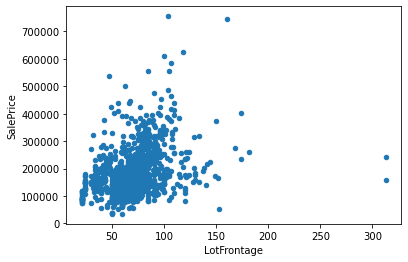

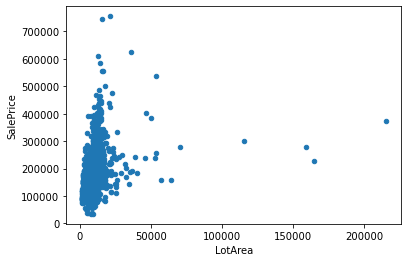

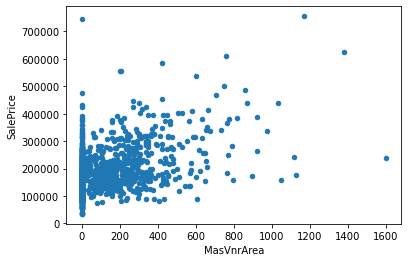

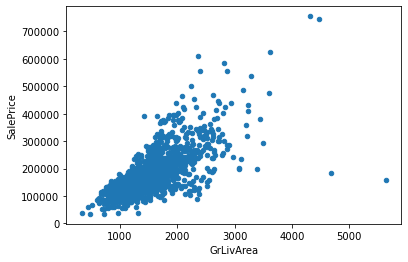

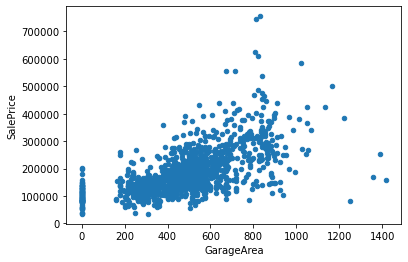

In [15]:
# Scatter plot of feature variables with target variable
num_cols = ["LotFrontage","LotArea","MasVnrArea","GrLivArea","GarageArea"]

for var in num_cols:
    dt= pd.concat([house["SalePrice"],house[var]], axis=1)
    dt.plot.scatter(x=var,y="SalePrice")

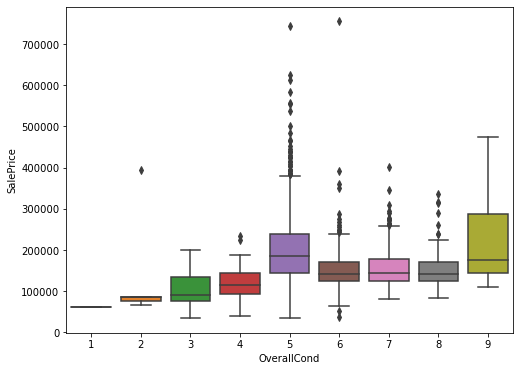

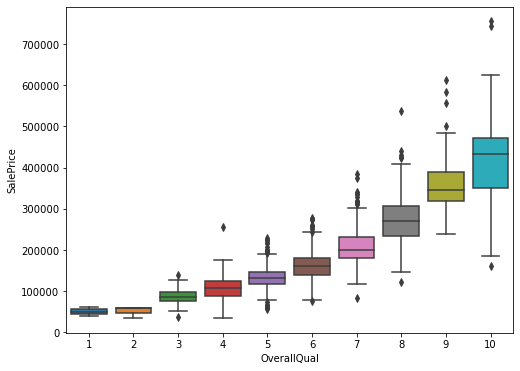

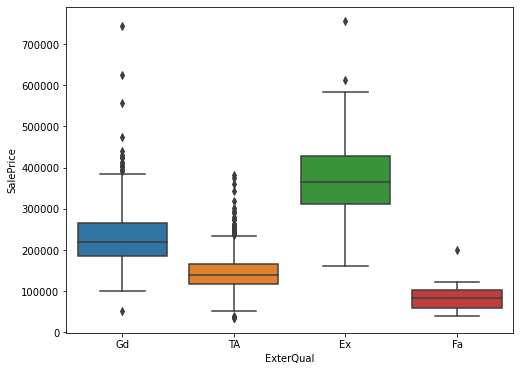

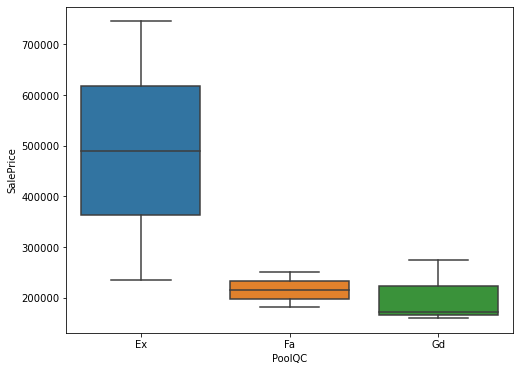

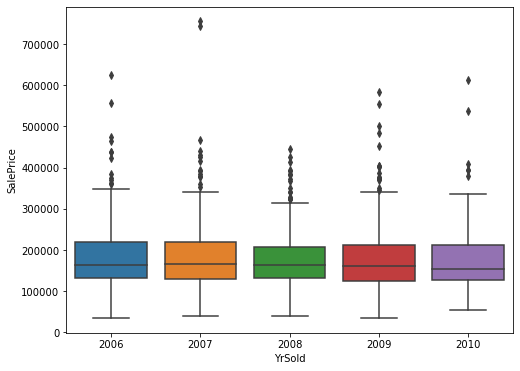

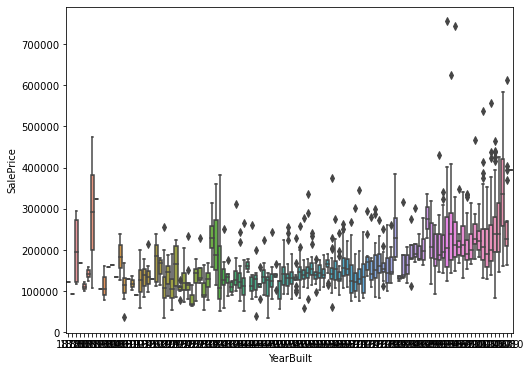

In [16]:
# Box plots for categorical variables
cat_cols = ["OverallCond","OverallQual","ExterQual","PoolQC","YrSold","YearBuilt"]

for var in cat_cols:
    data = pd.concat([house['SalePrice'], house[var]], axis=1)
    plt.subplots(figsize=(8, 6))
    sns.boxplot(x=var, y="SalePrice", data=data)

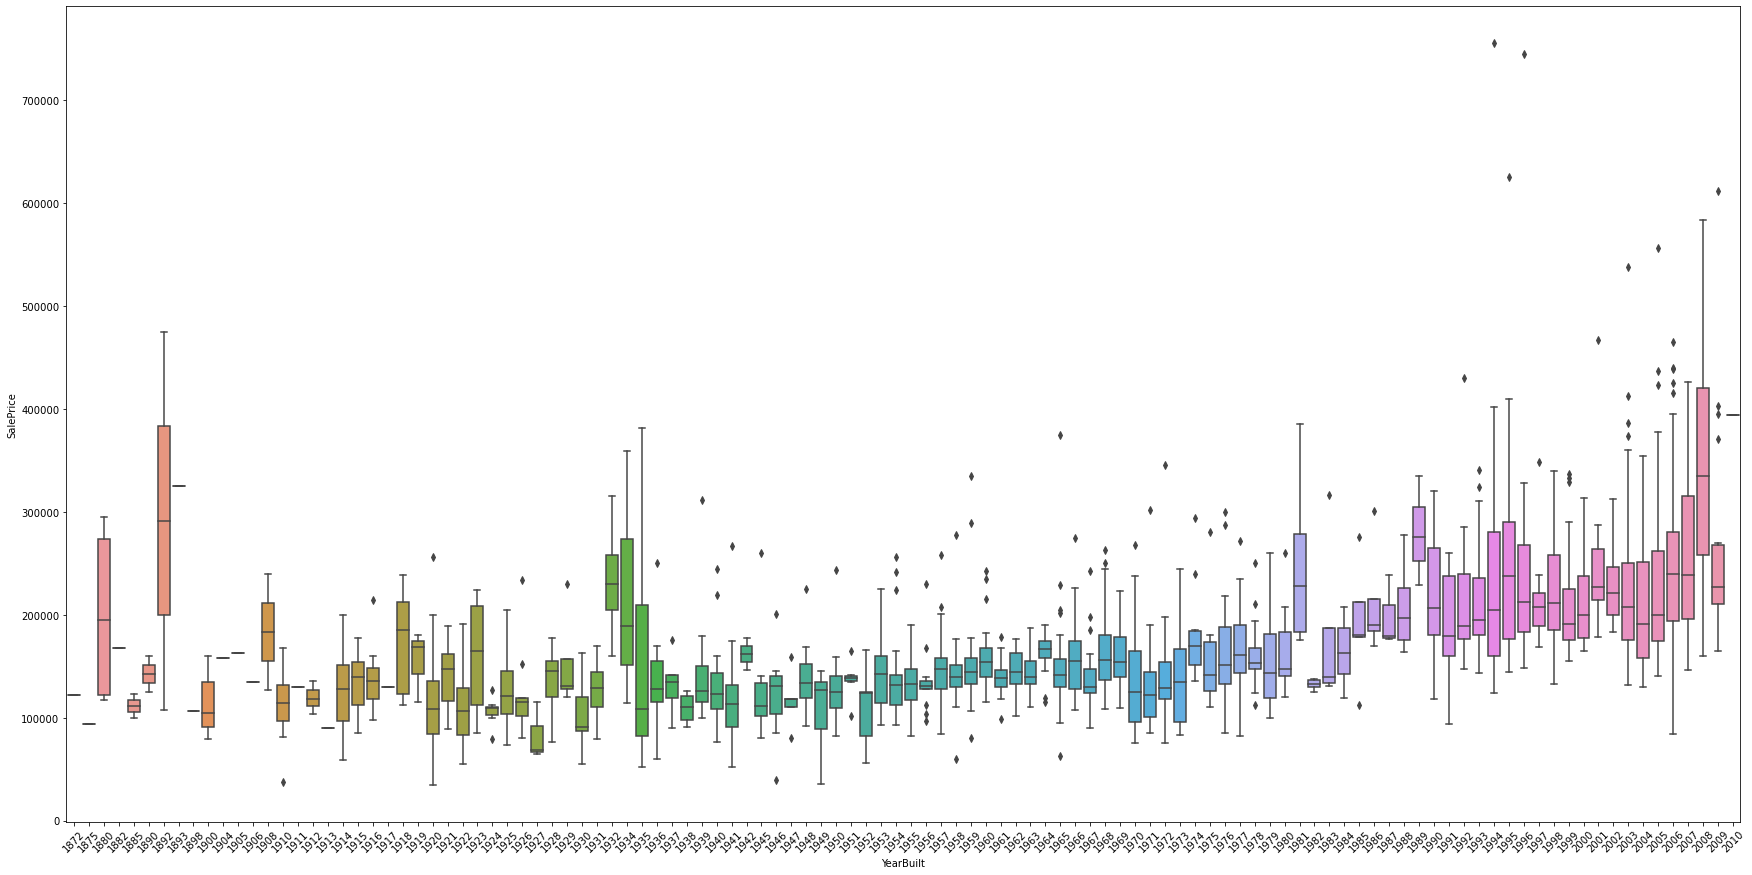

In [17]:
# Graph of YearBuilt is very huge so will display it in bigger resolution
data = pd.concat([house['SalePrice'], house["YearBuilt"]], axis=1)
plt.subplots(figsize=(30, 15))
sns.boxplot(x=var, y="SalePrice", data=data)

plt.xticks(rotation = 45);

##### Multiveriate 

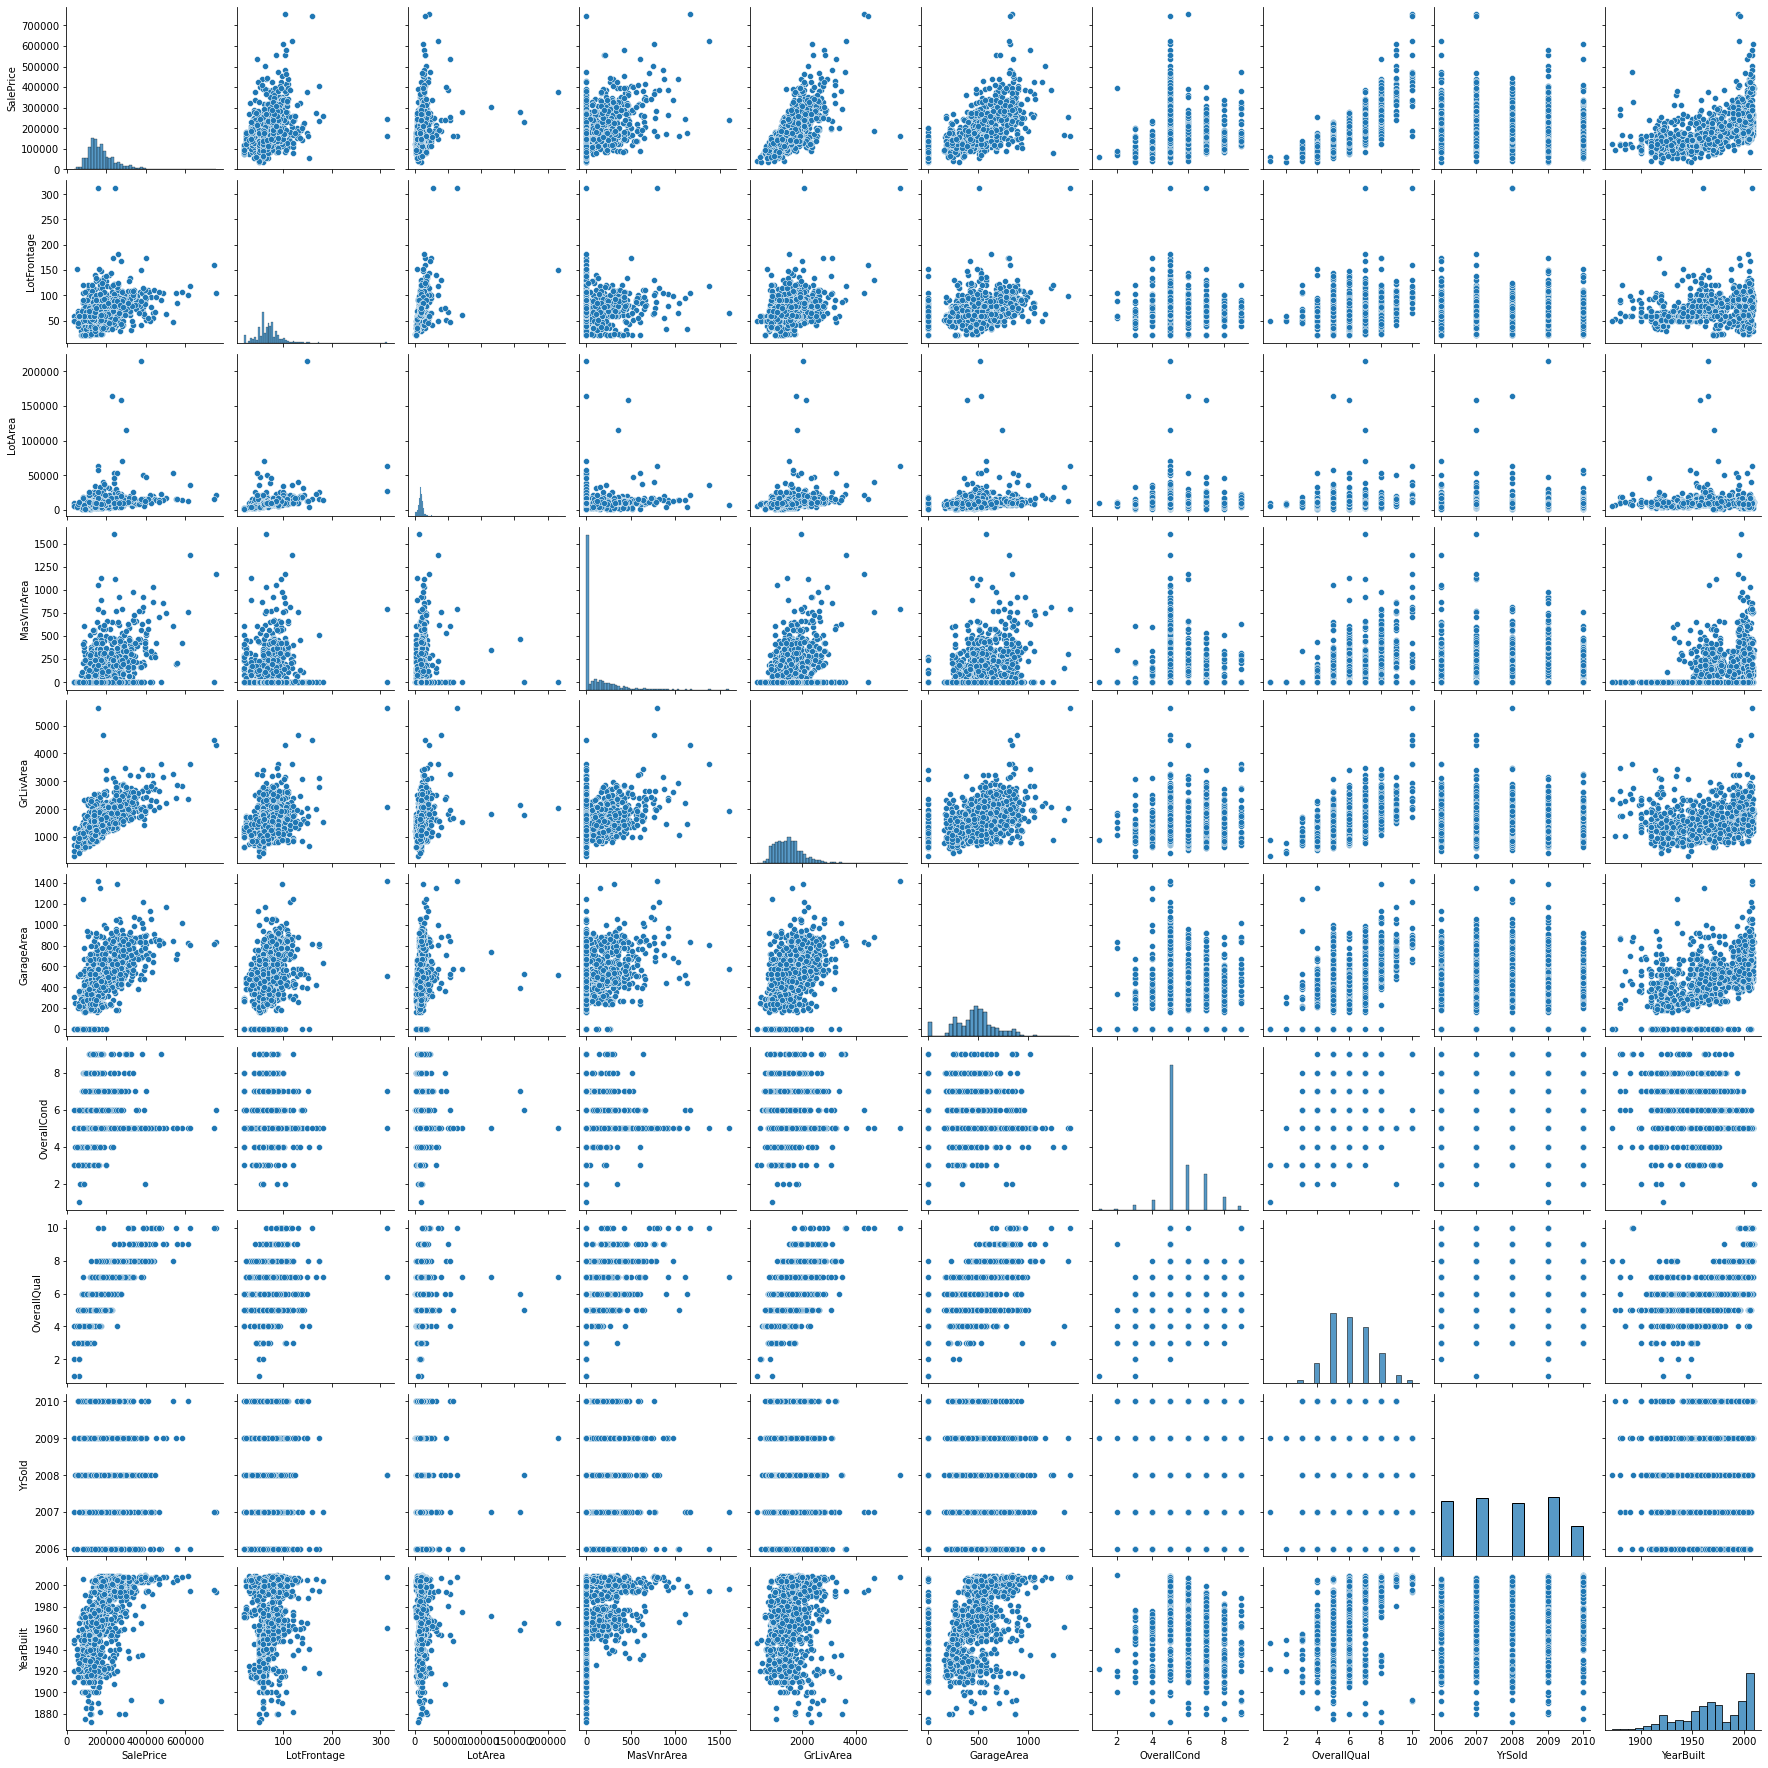

In [18]:
sns.pairplot(house[["SalePrice","LotFrontage","LotArea","MasVnrArea","GrLivArea","GarageArea","OverallCond","OverallQual","ExterQual","PoolQC","YrSold","YearBuilt"]])

In [19]:
#Correlation

cor = house.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


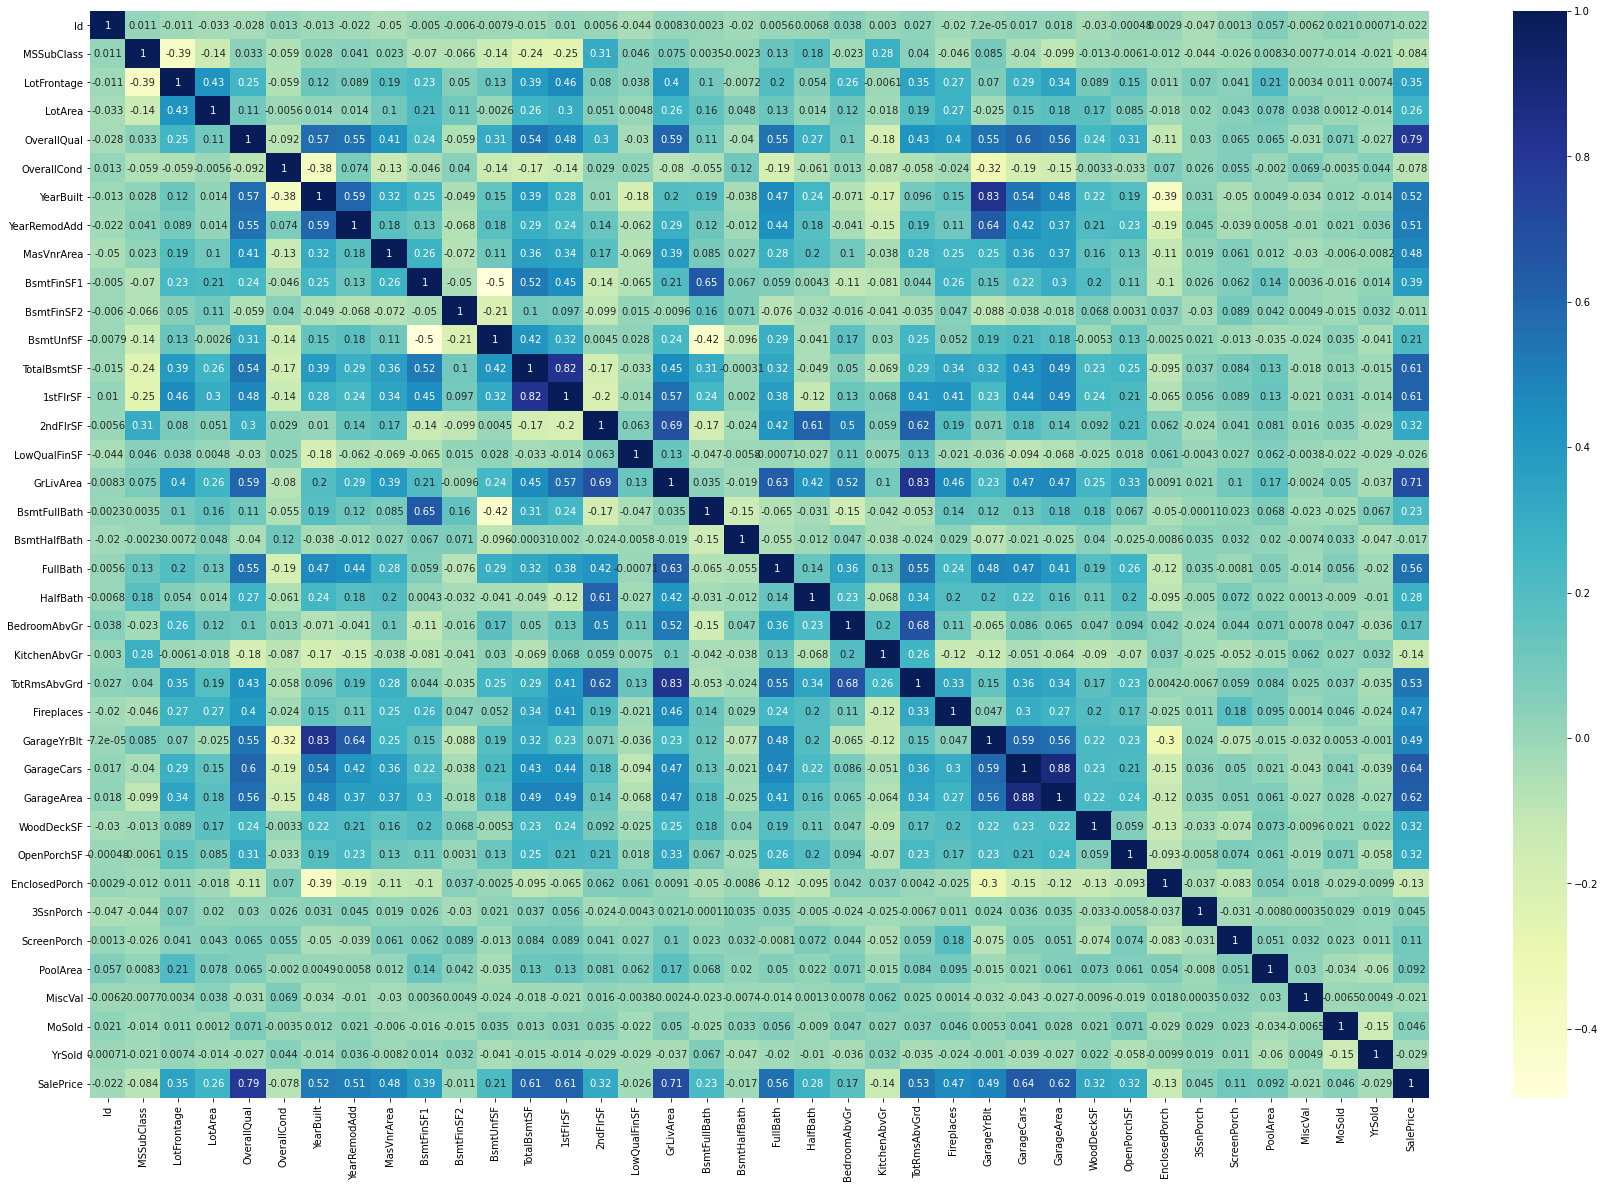

In [20]:
# Correlation plot on heatmap
#changing gigure size
plt.figure(figsize=(30,20))


sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

We have these variables which show high correlation form, as we can see from the heatmap.
YearBuilt, YearRemodAdd, TotalBsmtSF, GrLivArea, 1stFlrSF, 2ndFlrSF, GarageCars, OverallQual, FullBath, BsmtFinSF1

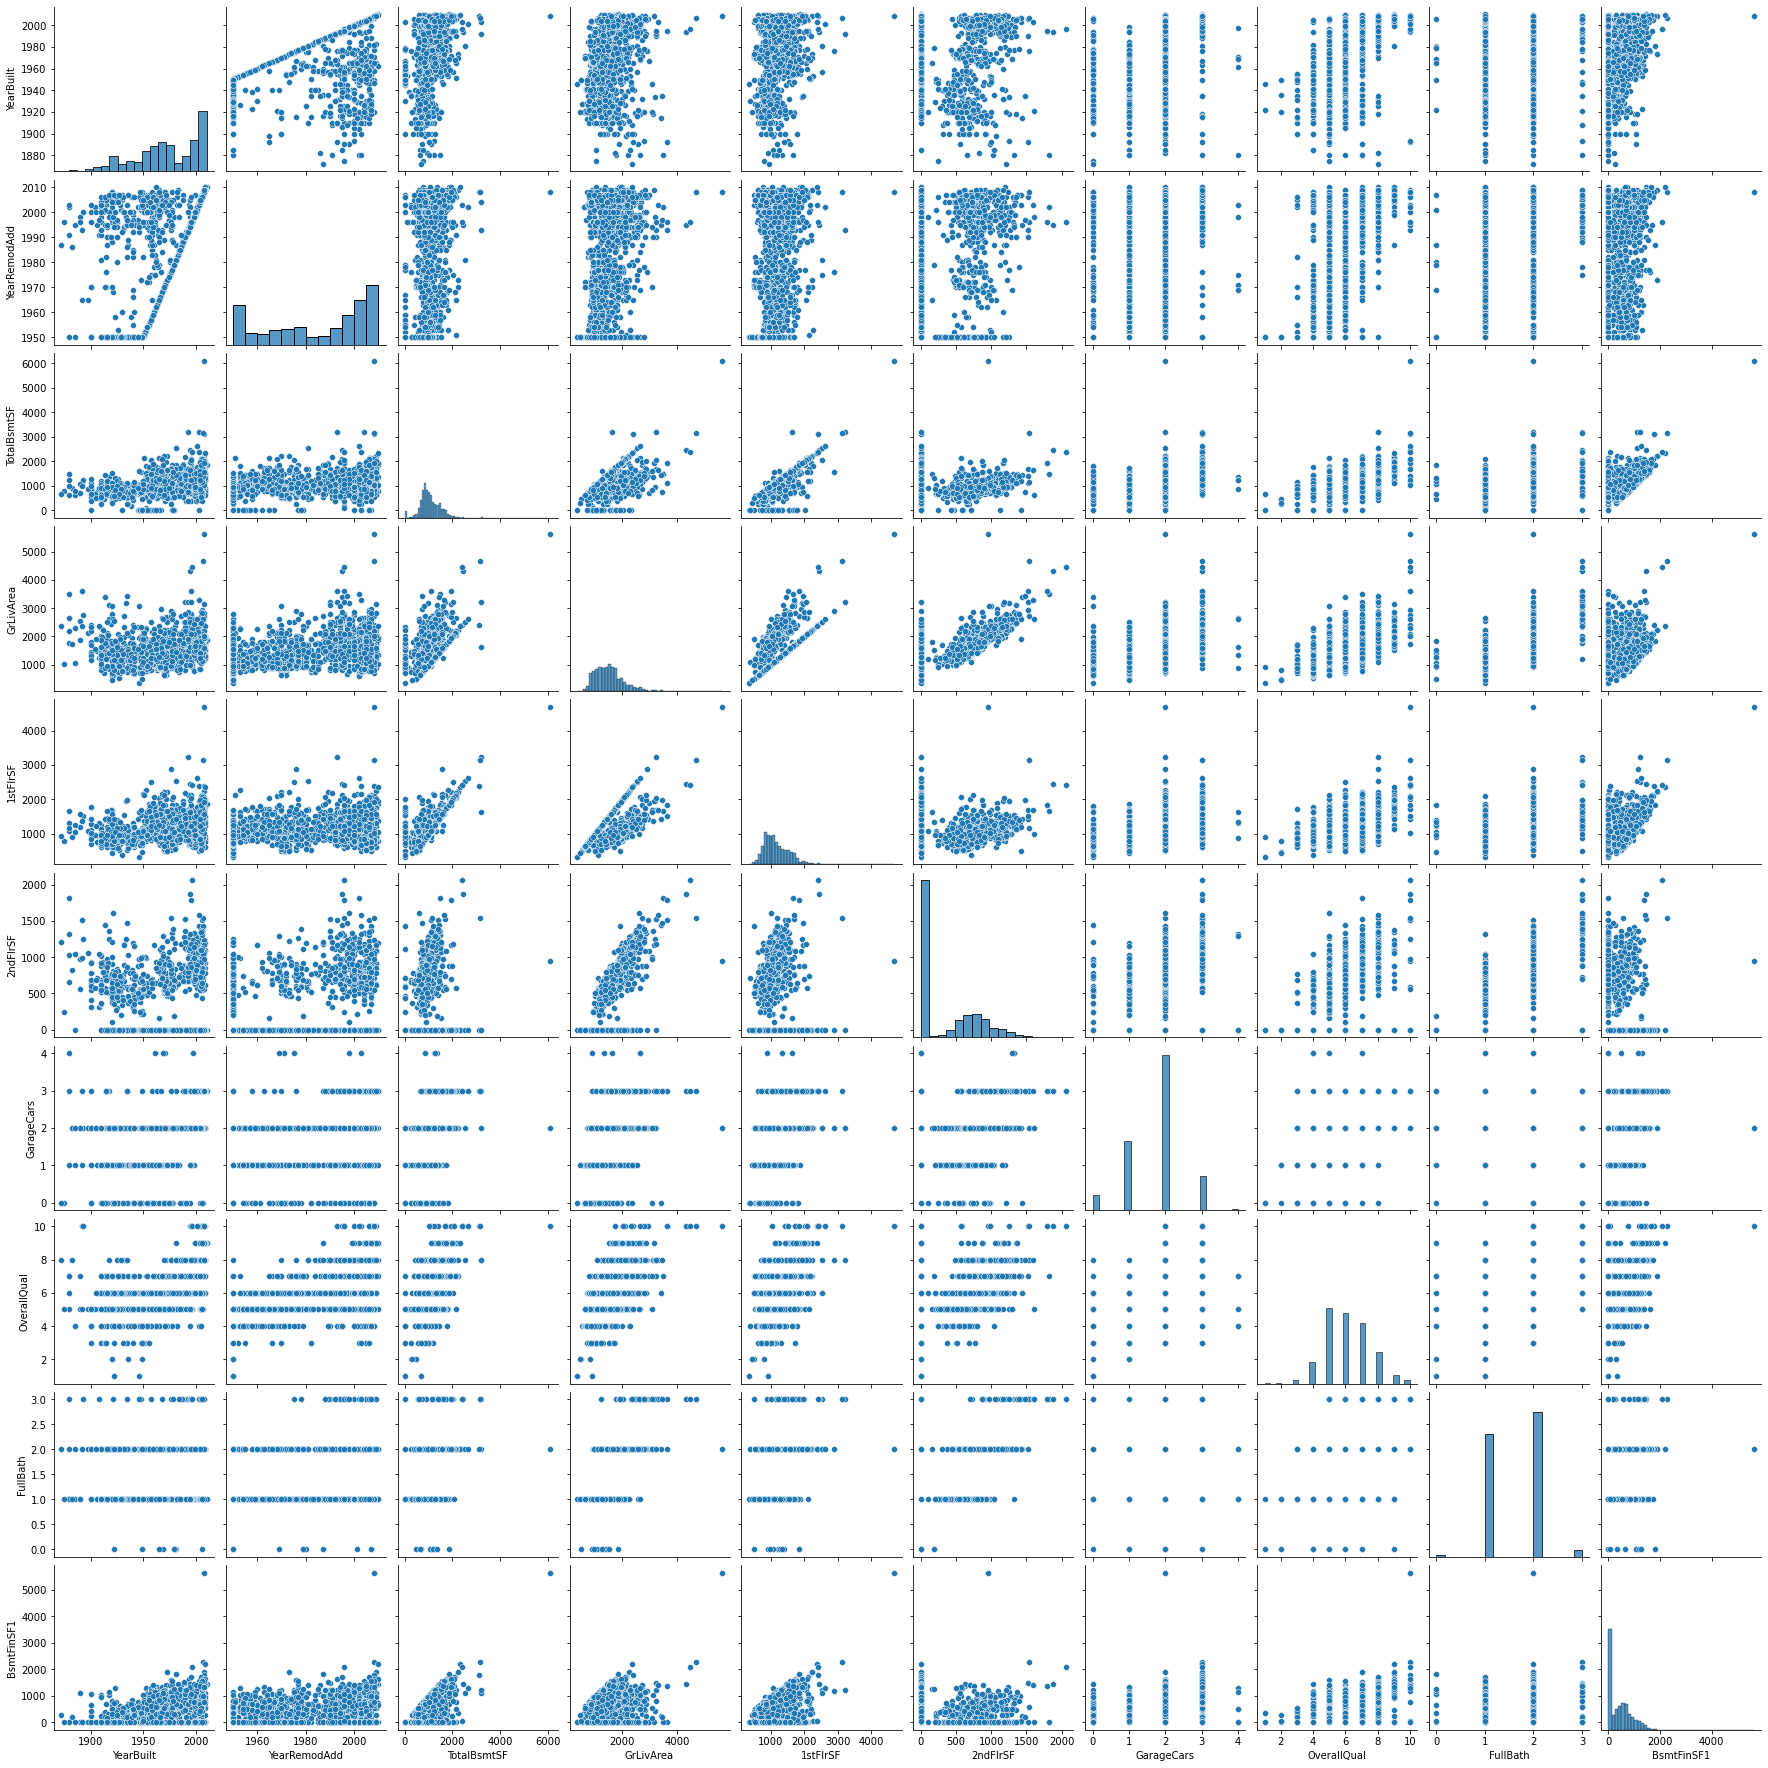

In [21]:
sns.pairplot(house[["YearBuilt", "YearRemodAdd", "TotalBsmtSF", "GrLivArea", "1stFlrSF", "2ndFlrSF", "GarageCars", "OverallQual", "FullBath", "BsmtFinSF1"]])

# Step 4- Missing Value Imputation if required

In [22]:
#id column is of no use on our data analysis
# so we will drop it
house = house.drop(["Id"], axis=1)

### Missing Data Treatment

In [23]:
# Checking null values

house.isnull().sum().head(60)
# house.isnull().sum().tail(21)

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

there are no major missing values for whole column except 1

In [24]:
mis_val = house.isnull().sum()
mis_val_percentage = 100*mis_val/len(house)
missing_val = pd.concat([mis_val,mis_val_percentage],axis =1)
missing_val = missing_val.rename(columns = {0:'Missing Values',1:'% of Total Values'})
missing_val = missing_val.sort_values('Missing Values',ascending = False)
missing_val.head(10)

,Missing Values,% of Total Values
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [25]:
#there are more than 80% missing values so we will remove top 4 variables
missing_data_col = ['Alley','PoolQC', 'Fence', 'MiscFeature']
house = house.drop(missing_data_col,axis=1)
house.shape

(1460, 76)

In [26]:
#we will go over columns

#LotFrontage has NA as we can see above
#we will use agerage for imputation of NAs

from sklearn.impute import SimpleImputer

# missing_values type for imputation
mean_imputation  = SimpleImputer(missing_values=np.nan, strategy='mean')
#fitting Imputer
mean_imputation = mean_imputation.fit(house[["LotFrontage"]])
#Imputing
house[["LotFrontage"]] = mean_imputation.transform(house[["LotFrontage"]])

In [27]:
house["LotFrontage"].isna().sum()

0

In [28]:
#doing it for rest of all the other columns
temp = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "MasVnrType"]

for i in temp:
    house[i].replace(np.nan,"NO", inplace=True)

In [29]:
from sklearn.impute import SimpleImputer

# missing_values type for imputation
imputer  = SimpleImputer(missing_values=np.nan, strategy='median')

In [30]:
house["MasVnrArea"].value_counts()

0.0      861
108.0      8
72.0       8
180.0      8
16.0       7
        ... 
31.0       1
366.0      1
528.0      1
894.0      1
415.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [31]:
#Replacing missing value with median
house["MasVnrArea"].replace(np.nan,house["MasVnrArea"].median(), inplace=True)
house["GarageYrBlt"].replace(np.nan,house["GarageYrBlt"].median(), inplace=True)

In [32]:
house.isna().sum().head(60)

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      1
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
FireplaceQ

In [33]:
#Electrical still has a NA value so we will replace it with mode
house["Electrical"].replace(np.nan,house["Electrical"].mode().values[0] , inplace=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

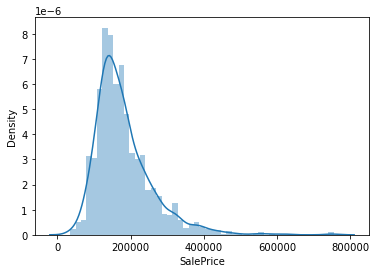

In [34]:
#Dist plot for SalePrice
sns.distplot(house["SalePrice"])

We see there is some skewness, so we will take the log of SalePrice

In [35]:
house['SalePrice_log'] = np.log(house['SalePrice'])

<AxesSubplot:xlabel='SalePrice_log', ylabel='Density'>

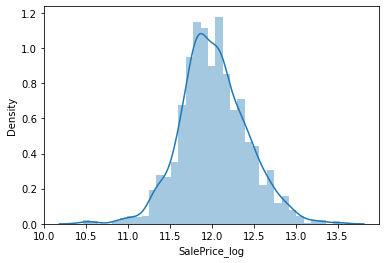

In [36]:
sns.distplot(house["SalePrice_log"])

Now it seems much better for normal distribution

In [37]:
#now we will drop the original column for SalePrice
house = house.drop('SalePrice',axis=1)

In [38]:
house.shape

(1460, 76)

In [39]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

# Step 5- Train-Test Split

In [40]:
# Getting all the Categorical and numerical columns
catCols = []
numCols = []
for i in house:
    if house[i].dtypes =="object":
        catCols.append(i)
    else:
        numCols.append(i)

In [41]:
print(catCols)
print(numCols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Pool

In [42]:
#convert categorical values to dummy variables
dummy = pd.get_dummies(house[catCols], drop_first=True)

In [43]:
#Concating the dataframe with dummies with the the original dataframe 
concat = pd.concat([house, dummy], axis=1)
concat.shape

(1460, 287)

In [44]:
#Dropping the original columns from where dummies are created
house_final = concat.drop(catCols, axis = 1)
house_final.shape

(1460, 248)

In [45]:
X = house_final.drop('SalePrice_log',axis =1)
y = house_final.pop('SalePrice_log')
print('X shape',X.shape)
print('y shape',y.shape)

X shape (1460, 247)
y shape (1460,)


In [46]:
## Splitting the data
#library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y ,train_size=0.7, test_size=0.3, random_state=100)

In [47]:
print('X train shape',X_train.shape)
print('X test shape',X_test.shape)
print('y train shape',y_train.shape)
print('y test shape',y_test.shape)

X train shape (1021, 247)
X test shape (438, 247)
y train shape (1021,)
y test shape (438,)


# Step 6- Modeling and Tuning with Regularization (Ridge & Lasso)

In [48]:
#list of alpha to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

### Ridge Regression

In [49]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [50]:
ridge = Ridge()

#5 fold cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [51]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 10.0}
0.8548772829100297


In [52]:
cv_result = pd.DataFrame(model_cv.cv_results_)
cv_result['param_alpha'] = cv_result['param_alpha'].astype('float32')
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013403,0.011107,0.004801,0.003920,0.0001,{'alpha': 0.0001},0.889513,0.651150,0.802332,0.575740,...,0.768058,0.134269,28,0.964605,0.963127,0.962055,0.960657,0.959972,0.962083,0.001670
1,0.010805,0.003972,0.001600,0.003200,0.0010,{'alpha': 0.001},0.889585,0.651296,0.803356,0.589172,...,0.771078,0.130610,27,0.964592,0.963127,0.962043,0.960648,0.959957,0.962073,0.001671
2,0.011554,0.006126,0.004466,0.007107,0.0100,{'alpha': 0.01},0.888636,0.652714,0.810110,0.688392,...,0.792659,0.106842,26,0.963726,0.963113,0.961273,0.960011,0.959025,0.961429,0.001785
3,0.003827,0.004791,0.004849,0.006339,0.0500,{'alpha': 0.05},0.880221,0.658246,0.817360,0.835854,...,0.821852,0.088943,23,0.958259,0.962895,0.956360,0.955109,0.953032,0.957131,0.003346
4,0.015715,0.000853,0.000000,0.000000,0.1000,{'alpha': 0.1},0.875172,0.664099,0.819127,0.874945,...,0.829173,0.087760,22,0.954241,0.962476,0.952755,0.950888,0.948582,0.953789,0.004738


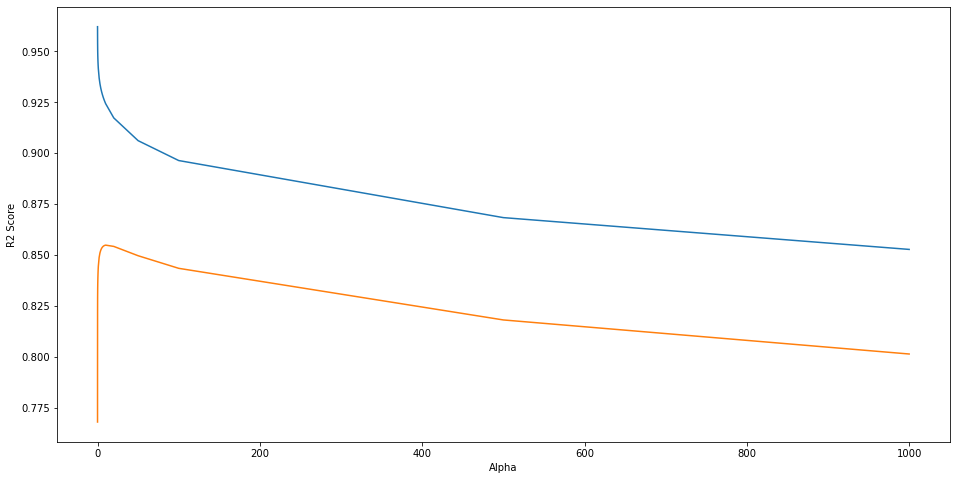

In [53]:
plt.figure(figsize=(16,8))
plt.plot(cv_result['param_alpha'],cv_result['mean_train_score'])
plt.plot(cv_result['param_alpha'],cv_result['mean_test_score'])
#plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

###### Prediction

In [54]:
ridge = Ridge(model_cv.best_params_['alpha'])
ridge.fit(X_train,y_train)

#Printing scores
y_train_pred = ridge.predict(X_train)
print('r2 score on train data with ridge',r2_score(y_train,y_train_pred))
print('rss train',np.sum(np.square(y_train - y_train_pred)))
y_test_pred = ridge.predict(X_test)
print('r2 score on test with ridge',r2_score(y_test,y_test_pred))
print('rss test',np.sum(np.square(y_test - y_test_pred)))

r2 score on train data with ridge 0.9202295667375724
rss train 12.802535703481155
r2 score on test with ridge 0.8875514063482818
rss test 8.10400945985468


There is a decent gap between the train score and test score so this is a case of overfitting

In [55]:
print(ridge.coef_)

[-6.10917584e-04 -4.71019887e-04  1.81821715e-06  5.81962411e-02
  3.69457149e-02  1.42036701e-03  1.15008335e-03 -1.68023217e-05
 -1.38437338e-05  3.53891651e-05 -9.16333484e-08  2.14538145e-05
  6.50413044e-05  7.95765165e-05  9.98235649e-06  1.54600206e-04
  5.29995646e-02  7.00997601e-03  2.72754769e-02  1.84229171e-02
  1.50805763e-02 -2.86028274e-02  7.92820314e-03  6.58270702e-04
 -3.66252682e-04  5.39499343e-02  3.41947752e-05  1.03349699e-04
 -2.60781702e-05  1.54001606e-04  2.48681366e-04  2.09146017e-04
 -4.55287280e-04 -2.84011552e-06 -8.16216010e-04 -5.39858490e-03
  5.38658915e-02  3.98367801e-02  6.44482813e-02  1.54379518e-02
  2.65697362e-02  2.22598498e-02 -4.41205536e-02  3.77998007e-03
  3.67261516e-02  3.79130601e-02  4.68117540e-02 -1.28152993e-02
  3.28422081e-02 -3.66142293e-02 -9.70492212e-03 -8.59190861e-03
  2.67827255e-02 -8.26569963e-03 -3.71372110e-03 -2.27814468e-02
  1.68006710e-02  5.41221346e-02 -1.47648679e-02  1.04579461e-01
 -7.86883525e-02 -2.60251

In [56]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(17.034, 'constant'),
 (0.105, 'Neighborhood_Crawfor'),
 (-0.095, 'Condition2_PosN'),
 (0.084, 'Neighborhood_NridgHt'),
 (-0.079, 'Neighborhood_Edwards'),
 (0.071, 'Neighborhood_Somerst'),
 (-0.066, 'Neighborhood_IDOTRR'),
 (0.064, 'MSZoning_RL'),
 (0.06, 'Condition1_Norm'),
 (0.058, 'OverallQual'),
 (0.058, 'Neighborhood_StoneBr'),
 (0.058, 'SaleType_ConLD'),
 (0.057, 'Exterior1st_BrkFace'),
 (0.054, 'GarageCars'),
 (0.054, 'MSZoning_FV'),
 (0.054, 'Neighborhood_ClearCr'),
 (0.053, 'BsmtFullBath'),
 (-0.05, 'Neighborhood_MeadowV'),
 (0.049, 'BsmtExposure_Gd'),
 (0.049, 'SaleCondition_Normal'),
 (-0.048, 'BldgType_Twnhs'),
 (-0.048, 'BsmtFinType1_Unf'),
 (0.048, 'CentralAir_Y'),
 (0.047, 'LandContour_Lvl'),
 (0.047, 'RoofMatl_WdShngl'),
 (-0.047, 'BsmtQual_Gd'),
 (-0.045, 'BsmtQual_TA'),
 (-0.044, 'LotShape_IR3'),
 (0.043, 'Neighborhood_NoRidge'),
 (-0.043, 'KitchenQual_Gd'),
 (-0.042, 'FireplaceQu_NO'),
 (-0.042, 'GarageQual_Fa'),
 (-0.041, 'KitchenQual_TA'),
 (0.04, 'MSZoning_RH'),


### LASSO Regression

In [57]:
#Library import
from sklearn.linear_model import Lasso

In [58]:
lasso = Lasso()

#5 fold cross validation
folds = 5
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv1.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [59]:
cv_result_1 = pd.DataFrame(model_cv1.cv_results_)
cv_result_1['param_alpha'] = cv_result_1['param_alpha'].astype('float32')
cv_result_1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.085423,0.020454,0.000000,0.000000,0.0001,{'alpha': 0.0001},0.891039,0.668917,0.833978,0.842965,...,0.833514,0.089366,2,0.953018,0.959328,0.951221,0.952394,0.947802,0.952753,0.003749
1,0.020919,0.005870,0.005429,0.006774,0.0010,{'alpha': 0.001},0.889302,0.692900,0.829050,0.917665,...,0.848732,0.084173,1,0.910091,0.933108,0.918532,0.905857,0.902944,0.914107,0.010858
2,0.009576,0.006016,0.004728,0.006275,0.0100,{'alpha': 0.01},0.849416,0.620491,0.792639,0.893135,...,0.811341,0.102914,3,0.850808,0.885015,0.866611,0.844914,0.840234,0.857516,0.016379
3,0.044405,0.014990,0.000000,0.000000,0.0500,{'alpha': 0.05},0.832495,0.564393,0.747214,0.854302,...,0.774668,0.113762,4,0.818625,0.849710,0.835172,0.814564,0.804790,0.824572,0.015945
4,0.032173,0.007224,0.001602,0.003204,0.1000,{'alpha': 0.1},0.813032,0.537924,0.721536,0.829152,...,0.750147,0.114755,6,0.789249,0.834373,0.815078,0.789213,0.776805,0.800944,0.020854


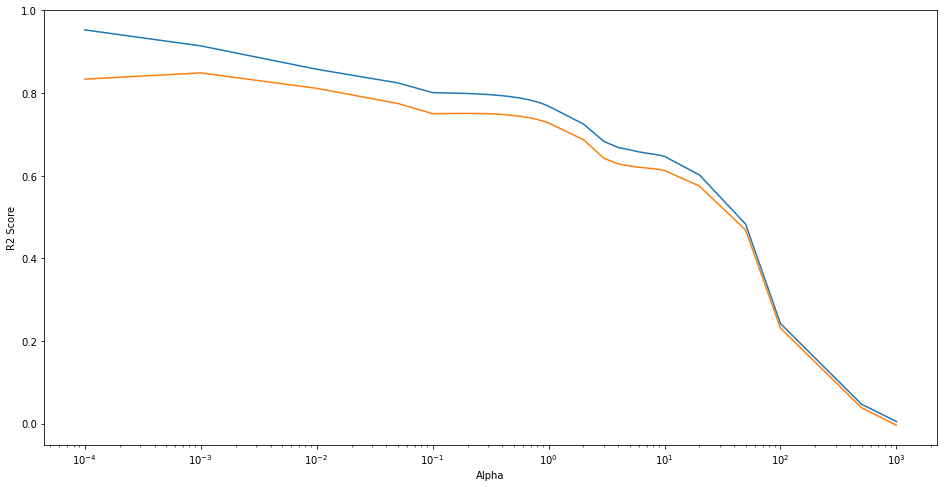

In [60]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_1['param_alpha'],cv_result_1['mean_train_score'])
plt.plot(cv_result_1['param_alpha'],cv_result_1['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [61]:
print(model_cv1.best_params_)
print(model_cv1.best_score_)

{'alpha': 0.001}
0.8487318170076034


In [62]:
lasso = Lasso(alpha=model_cv1.best_params_['alpha'])
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('r2 score on train data with lasso',r2_score(y_true=y_train,y_pred=y_train_pred))
print('r2 score on test data with lasso',r2_score(y_true=y_test,y_pred=y_test_pred))

r2 score on train data with lasso 0.9062122102037385
r2 score on test data with lasso 0.8811710295777795


In [63]:
print(lasso.coef_)

[-5.94980726e-04 -5.11048349e-04  1.84123234e-06  6.51034362e-02
  4.19349733e-02  2.09501533e-03  1.20717008e-03 -5.55979739e-06
  1.80442673e-05  4.85076618e-05  3.04700808e-05  1.88618131e-05
  1.97009683e-04  2.18344333e-04  1.73607593e-04  2.70260488e-05
  5.72128588e-02  0.00000000e+00  1.27168072e-02  8.13025258e-03
  8.64009295e-03 -2.48978435e-03  5.87705598e-03  0.00000000e+00
 -1.89060382e-04  5.19647132e-02  4.09337671e-05  1.18051740e-04
 -2.09167909e-05  1.65298415e-04  2.34988376e-04  2.50344545e-04
 -5.86050234e-04 -5.51297390e-06 -9.37697674e-04 -6.14354635e-03
  1.39452990e-02  0.00000000e+00  5.76955804e-02 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.16747598e-02 -0.00000000e+00
  2.59572204e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  3.32272098e-03 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  7.14385995e-03  4.31511886e-02 -0.00000000e+00  1.16055354e-01
 -6.22088103e-02 -0.00000

In [64]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(16.807, 'constant'),
 (-0.206, 'Condition2_PosN'),
 (0.116, 'Neighborhood_Crawfor'),
 (0.097, 'Neighborhood_Somerst'),
 (0.087, 'Neighborhood_NridgHt'),
 (0.065, 'OverallQual'),
 (-0.062, 'Neighborhood_Edwards'),
 (0.06, 'Condition1_Norm'),
 (0.058, 'MSZoning_RL'),
 (0.058, 'Exterior1st_BrkFace'),
 (0.057, 'BsmtFullBath'),
 (0.052, 'GarageCars'),
 (0.052, 'BsmtExposure_Gd'),
 (-0.049, 'BldgType_Twnhs'),
 (-0.046, 'FireplaceQu_NO'),
 (0.043, 'Neighborhood_ClearCr'),
 (0.042, 'OverallCond'),
 (-0.042, 'Neighborhood_IDOTRR'),
 (-0.042, 'BsmtFinType1_Unf'),
 (0.034, 'CentralAir_Y'),
 (0.032, 'SaleType_New'),
 (0.031, 'SaleCondition_Normal'),
 (0.026, 'LotConfig_CulDSac'),
 (0.025, 'Neighborhood_NoRidge'),
 (0.023, 'Functional_Typ'),
 (0.022, 'Foundation_PConc'),
 (0.022, 'BsmtFinType2_Unf'),
 (0.021, 'GarageType_Attchd'),
 (0.019, 'Neighborhood_StoneBr'),
 (-0.019, 'HouseStyle_2Story'),
 (-0.019, 'BsmtQual_Gd'),
 (-0.019, 'GarageFinish_Unf'),
 (0.016, 'Exterior2nd_MetalSd'),
 (0.014, 'MS

# Step 7- Evaluation

In [65]:
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)

Error distribution in train dataset


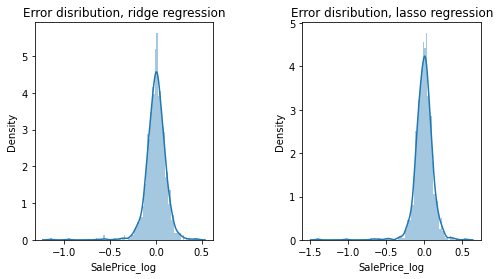

In [66]:
print('Error distribution in train dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge_train), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso_train), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [67]:
print('r2_score in train dataset')
print('r2_score for ridge:', r2_score(y_train, y_pred_ridge_train))
print('r2_score for lasso:', r2_score(y_train, y_pred_lasso_train))

r2_score in train dataset
r2_score for ridge: 0.9202295667375724
r2_score for lasso: 0.9062122102037385


In [68]:

y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)

Error distribution in test dataset


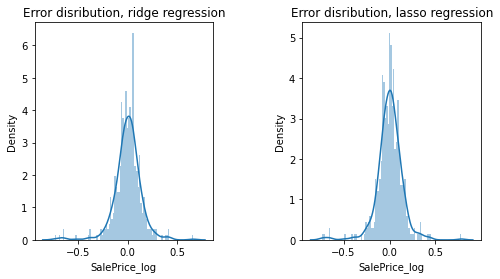

In [69]:
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)


In [70]:
print('r2_score in train dataset:')
print('r2_score for ridge:', round(r2_score(y_train, y_pred_ridge_train), 4))
print('r2_score for lasso:', round(r2_score(y_train, y_pred_lasso_train), 4))

print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 4))
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 4))

r2_score in train dataset:
r2_score for ridge: 0.9202
r2_score for lasso: 0.9062
r2_score in test dataset:
r2_score for ridge: 0.8876
r2_score for lasso: 0.8812
